In [165]:
import requests
from bs4 import BeautifulSoup 
import random
import pandas as pd
from datetime import datetime
import time

#importing visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
#pip install selenium

In [3]:
#importing necessary packages for selenium as attendances are 
#populated using javascript therefore regular scraping will not suffice
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

#### Running for one web page on leagueofireland.ie

In [70]:
#opening the webdriver
driver = webdriver.Chrome()  

In [80]:
#url = "https://www.leagueofireland.ie/game_centre/2283/"
url = "https://www.leagueofireland.ie/game_centre/329/"

In [72]:
driver.get(url)

In [73]:
# Handle alert if it appears
try:
    alert = WebDriverWait(driver, 2).until(EC.alert_is_present())  # Wait for alert
    alert.accept()  # Accept the alert (you can use alert.dismiss() to close it)
except:
    pass  # If no alert, just continue

try:
    # Wait for the attendance element to be populated
    game_centre_info_element = WebDriverWait(driver, 5).until(
                               EC.presence_of_element_located((By.CLASS_NAME, "game-centre__header--info"))
                                )
    score_element = WebDriverWait(driver, 5).until(
                           EC.presence_of_element_located((By.CLASS_NAME, "game-centre__header--score"))
                            )
    kick_off_element = WebDriverWait(driver, 5).until(
                           EC.presence_of_element_located((By.CLASS_NAME, "game-centre__header--kickoff"))
                            )
    
    #getting the score and game centre info
    game_score = score_element.text.strip()
    game_centre_info = game_centre_info_element.text.strip()
    kick_off_time = kick_off_element.text.strip()
    
    if game_score == 'v':
        home_goals = 'postponed'
        away_goals = 'postponed'
    else:
        home_goals_element = WebDriverWait(driver, 5).until(
                            EC.presence_of_element_located((By.CLASS_NAME, "home-goals"))
                                )
        away_goals_element = WebDriverWait(driver, 5).until(
                               EC.presence_of_element_located((By.CLASS_NAME, "away-goals"))
                                )
        home_goals = home_goals_element.text.strip()
        away_goals = away_goals_element.text.strip()
    
except Exception as e:
    print("Error:", e)
    
finally:
    driver.quit()

In [ ]:
#parsing response
lines = game_centre_info.split("\n")
match_date = lines[0].strip()
stadium = lines[2].strip()
attendance = lines[3].replace("Att: ", "").strip()

In [ ]:
#casting as number
attendance = int(attendance.replace(",", ""))

In [ ]:
#changing format of date
date_obj = datetime.strptime(match_date, "%a %d %b %Y")
formatted_date = date_obj.strftime("%d/%m/%Y")

In [41]:
response = requests.get(url)

if response.status_code == 200:
    page_content = response.text
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    
soup = BeautifulSoup(page_content, 'html.parser')

#away_team = soup.find('h6', class_='text-center text-lg-start mb-2').get_text(strip=True)
teams = soup.find_all('span', class_='d-none d-lg-block')
# Extracting the text from each span
team_names = [team.get_text(strip=True) for team in teams]
home_team = team_names[0]
away_team = team_names[1]
    
print(f"{home_team} vs {away_team}")

Shamrock Rovers FC vs St. Patrick's Athletic FC


### I want to only focus on premier division games for now

In [87]:
url = "https://www.leagueofireland.ie/game_centre/4/"

In [98]:
response = requests.get(url)

if response.status_code == 200:
    page_content = response.text
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")
    
soup = BeautifulSoup(page_content, 'html.parser')

# Find the meta tag with name="description"
meta_tag = soup.find("meta", attrs={"name": "description"})
# Extract the content
meta_content = meta_tag["content"] if meta_tag else ""

# Find the part that starts with "Premier"
for word in meta_content.split(","):
    if "Premier" in word:
        

Premier


In [84]:
title_text = soup.title.text
title_text

'League of Ireland | Cork City FC v Shelbourne FC'

In [ ]:
# not all game centre infos are completely populated so need to account for this to avoid errors
game_centre_info

In [ ]:
lines = game_centre_info.split("\n")
lines

-------
### writing a function to iterate through all the 'game centres' on leagueofireland.ie

In [101]:
def check_premier(url):
    response = requests.get(url)

    if response.status_code == 200:
        page_content = response.text
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

    soup = BeautifulSoup(page_content, 'html.parser')

    # Find the meta tag with name="description"
    meta_tag = soup.find("meta", attrs={"name": "description"})
    # Extract the content
    meta_content = meta_tag["content"] if meta_tag else ""

    # Find the part that starts with "Premier"
    cont = False
    for word in meta_content.split(","):
        if "Premier" in word:
            cont = True
    return cont

In [104]:
check_premier("https://www.leagueofireland.ie/game_centre/329/")

False

In [105]:
def scrape_loi_webpage(url):
    #opening the webdriver
    print(f'Running for {url}')
    driver = webdriver.Chrome() 
    driver.get(url)
    
    time.sleep(.5)
    # Handle alert if it appears
    try:
        alert = WebDriverWait(driver, 2).until(EC.alert_is_present())  # Wait for alert
        alert.accept()  # Accept the alert (you can use alert.dismiss() to close it)
    except:
        pass  # If no alert, just continue

    try:
        # Wait for the attendance element to be populated
        game_centre_info_element = WebDriverWait(driver, 5).until(
                                   EC.presence_of_element_located((By.CLASS_NAME, "game-centre__header--info"))
                                    )
        score_element = WebDriverWait(driver, 5).until(
                               EC.presence_of_element_located((By.CLASS_NAME, "game-centre__header--score"))
                                )
        kick_off_element = WebDriverWait(driver, 5).until(
                               EC.presence_of_element_located((By.CLASS_NAME, "game-centre__header--kickoff"))
                                )

        #getting the score and game centre info
        game_score = score_element.text.strip()
        game_centre_info = game_centre_info_element.text.strip()
        kick_off_time = kick_off_element.text.strip()

        if game_score == 'v':
            home_goals = 'postponed'
            away_goals = 'postponed'
        else:
            home_goals_element = WebDriverWait(driver, 5).until(
                                EC.presence_of_element_located((By.CLASS_NAME, "home-goals"))
                                    )
            away_goals_element = WebDriverWait(driver, 5).until(
                                   EC.presence_of_element_located((By.CLASS_NAME, "away-goals"))
                                    )
            home_goals = home_goals_element.text.strip()
            away_goals = away_goals_element.text.strip()

    except Exception as e:
        print("Error:", e)

    finally:
        driver.quit()
    #------------------------------#
            
    #using regular html request to get teams
    response = requests.get(url)

    if response.status_code == 200:
        page_content = response.text
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

    soup = BeautifulSoup(page_content, 'html.parser')

    teams = soup.find_all('span', class_='d-none d-lg-block')
    # Extracting the text from each span
    team_names = [team.get_text(strip=True) for team in teams]
    home_team = team_names[0]
    away_team = team_names[1]
    
    game_centre_info = game_centre_info.split("\n")
    
    #creating dataframe
    return home_team, away_team, game_score, kick_off_time, home_goals, away_goals, game_centre_info

In [ ]:
url = "https://www.leagueofireland.ie/game_centre/4454/"
data = scrape_loi_webpage(url)

In [ ]:
data

In [ ]:
df = pd.DataFrame([data], columns=["home_team", "away_team", "score", "game_centre_info"])
df

#### Looping through all game centres available on leagueofireland.ie

In [106]:
columns = ["home_team", "away_team", "score","kick_off_time","home_goals","away_goals", "game_centre_info"]
loi_df = pd.DataFrame(columns=columns)
loi_df

,home_team,away_team,score,kick_off_time,home_goals,away_goals,game_centre_info


In [107]:
for i in range (1, 4456):
    url = f"https://www.leagueofireland.ie/game_centre/{i}/"
    #run function to determine whether or not premier division game
    is_prem = check_premier(url)
    #if it is premier division game, continue with processing
    if is_prem: 
        data = scrape_loi_webpage(url)
        df = pd.DataFrame([data], columns=columns)
        loi_df =  pd.concat([loi_df, df], ignore_index=True)

Running for https://www.leagueofireland.ie/game_centre/1/
Running for https://www.leagueofireland.ie/game_centre/2/
Running for https://www.leagueofireland.ie/game_centre/3/
Running for https://www.leagueofireland.ie/game_centre/4/
Running for https://www.leagueofireland.ie/game_centre/5/
Running for https://www.leagueofireland.ie/game_centre/6/
Running for https://www.leagueofireland.ie/game_centre/7/
Running for https://www.leagueofireland.ie/game_centre/8/
Running for https://www.leagueofireland.ie/game_centre/9/
Running for https://www.leagueofireland.ie/game_centre/10/
Running for https://www.leagueofireland.ie/game_centre/11/
Running for https://www.leagueofireland.ie/game_centre/12/
Running for https://www.leagueofireland.ie/game_centre/13/
Running for https://www.leagueofireland.ie/game_centre/14/
Running for https://www.leagueofireland.ie/game_centre/15/
Running for https://www.leagueofireland.ie/game_centre/16/
Running for https://www.leagueofireland.ie/game_centre/17/
Runnin

Running for https://www.leagueofireland.ie/game_centre/140/
Running for https://www.leagueofireland.ie/game_centre/141/
Running for https://www.leagueofireland.ie/game_centre/142/
Running for https://www.leagueofireland.ie/game_centre/143/
Running for https://www.leagueofireland.ie/game_centre/144/
Running for https://www.leagueofireland.ie/game_centre/145/
Running for https://www.leagueofireland.ie/game_centre/146/
Running for https://www.leagueofireland.ie/game_centre/147/
Running for https://www.leagueofireland.ie/game_centre/148/
Running for https://www.leagueofireland.ie/game_centre/149/
Running for https://www.leagueofireland.ie/game_centre/150/
Running for https://www.leagueofireland.ie/game_centre/151/
Running for https://www.leagueofireland.ie/game_centre/152/
Running for https://www.leagueofireland.ie/game_centre/153/
Running for https://www.leagueofireland.ie/game_centre/154/
Running for https://www.leagueofireland.ie/game_centre/155/
Running for https://www.leagueofireland.

Running for https://www.leagueofireland.ie/game_centre/2196/
Running for https://www.leagueofireland.ie/game_centre/2197/
Running for https://www.leagueofireland.ie/game_centre/2198/
Running for https://www.leagueofireland.ie/game_centre/2199/
Running for https://www.leagueofireland.ie/game_centre/2200/
Running for https://www.leagueofireland.ie/game_centre/2201/
Running for https://www.leagueofireland.ie/game_centre/2202/
Running for https://www.leagueofireland.ie/game_centre/2203/
Running for https://www.leagueofireland.ie/game_centre/2204/
Running for https://www.leagueofireland.ie/game_centre/2205/
Running for https://www.leagueofireland.ie/game_centre/2206/
Running for https://www.leagueofireland.ie/game_centre/2207/
Running for https://www.leagueofireland.ie/game_centre/2208/
Running for https://www.leagueofireland.ie/game_centre/2209/
Running for https://www.leagueofireland.ie/game_centre/2210/
Running for https://www.leagueofireland.ie/game_centre/2211/
Running for https://www.

In [111]:
#loi_df[loi_df['home_team'].str.contains("Sli")]

In [108]:
#loi_df.to_csv('loi_df.csv')

In [138]:
sligo_rovers = loi_df[
    (loi_df['home_team'].str.contains("Sli", na=False)) | 
    (loi_df['away_team'].str.contains("Sli", na=False))
]

In [139]:
sligo_rovers.reset_index(drop=True, inplace=True)
sligo_rovers.head()

,home_team,away_team,score,kick_off_time,home_goals,away_goals,game_centre_info
0,Sligo Rovers,Shamrock Rovers,1 - 1,Half Time: 0-1\nKO Time: 19:45,L. Browning-Lagerfeldt 94',17' G. Burke,"[Sat 18 Feb 2023, Damien MacGraith, The Showgr..."
1,UCD,Sligo Rovers,2 - 3,Half Time: 1-1\nKO Time: 19:45,A. Nolan 5'\nD. Kinsella-Bishop 49',21' M. Mata\n69' M. Mata\n82' M. Mata,"[Fri 24 Feb 2023, Raymond Matthews, UCD Bowl, ..."
2,Drogheda United,Sligo Rovers,1 - 0,Half Time: 0-0\nKO Time: 19:45,A. Foley 59',,"[Fri 3 Mar 2023, Adriano Reale, Weavers Park, ..."
3,Sligo Rovers,St Patrick's Athletic,2 - 1,Half Time: 1-0\nKO Time: 19:45,R. Hutchinson 32'\nF. Hartmann 67',62' C. Forrester,"[Mon 6 Mar 2023, Robert Hennessy, The Showgrou..."
4,Sligo Rovers,Cork City,2 - 2,Half Time: 0-1\nKO Time: 19:45,É. Clancy 79'\nM. Mata 93',18' J. Häkkinen\n63' R. Keating,"[Sat 11 Mar 2023, Arnold Hunter, The Showgroun..."


#### parsing game_centre_info

In [140]:
sligo_rovers = sligo_rovers.copy()

In [141]:
# Convert match_info to string to avoid errors
sligo_rovers['game_centre_info'] = sligo_rovers['game_centre_info'].astype(str)

# Remove brackets and split the string by ", "
sligo_rovers[['date', 'referee', 'stadium', 'attendance']] = (
    sligo_rovers['game_centre_info']
    .str.strip('[]')  # Remove brackets
    .str.split(', ', expand=True)  # Split by comma and space
)


In [143]:
sligo_rovers.head()

,home_team,away_team,score,kick_off_time,home_goals,away_goals,game_centre_info,date,referee,stadium,attendance
0,Sligo Rovers,Shamrock Rovers,1 - 1,Half Time: 0-1\nKO Time: 19:45,L. Browning-Lagerfeldt 94',17' G. Burke,"['Sat 18 Feb 2023', 'Damien MacGraith', 'The S...",'Sat 18 Feb 2023','Damien MacGraith','The Showgrounds',"'Att: 4,248'"
1,UCD,Sligo Rovers,2 - 3,Half Time: 1-1\nKO Time: 19:45,A. Nolan 5'\nD. Kinsella-Bishop 49',21' M. Mata\n69' M. Mata\n82' M. Mata,"['Fri 24 Feb 2023', 'Raymond Matthews', 'UCD B...",'Fri 24 Feb 2023','Raymond Matthews','UCD Bowl','Att: 716'
2,Drogheda United,Sligo Rovers,1 - 0,Half Time: 0-0\nKO Time: 19:45,A. Foley 59',,"['Fri 3 Mar 2023', 'Adriano Reale', 'Weavers P...",'Fri 3 Mar 2023','Adriano Reale','Weavers Park',"'Att: 1,544'"
3,Sligo Rovers,St Patrick's Athletic,2 - 1,Half Time: 1-0\nKO Time: 19:45,R. Hutchinson 32'\nF. Hartmann 67',62' C. Forrester,"['Mon 6 Mar 2023', 'Robert Hennessy', 'The Sho...",'Mon 6 Mar 2023','Robert Hennessy','The Showgrounds',"'Att: 2,751'"
4,Sligo Rovers,Cork City,2 - 2,Half Time: 0-1\nKO Time: 19:45,É. Clancy 79'\nM. Mata 93',18' J. Häkkinen\n63' R. Keating,"['Sat 11 Mar 2023', 'Arnold Hunter', 'The Show...",'Sat 11 Mar 2023','Arnold Hunter','The Showgrounds',"'Att: 3,178'"


In [163]:
#formatting the date column
sligo_rovers['date'] = pd.to_datetime(sligo_rovers['date'].str[4:-1].str.strip(), format='%d %b %Y').dt.strftime('%d.%m.%Y')

# Extract numeric attendance (removing "Att: " and commas)
sligo_rovers['attendance'] = sligo_rovers['attendance'].str.extract(r'(\d[\d,]*)')[0].str.replace(',', '').astype(int)

In [177]:
sligo_rovers.tail()

,home_team,away_team,score,kick_off_time,home_goals,away_goals,game_centre_info,date,referee,stadium,attendance
69,Sligo Rovers,Bohemians,0 - 2,Half Time: 0-1\nKO Time: 19:45,,23' D. Devoy\n82' A. Meekison,"['Sat 19 Oct 2024', 'Robert Harvey', 'The Show...",19.10.2024,'Robert Harvey','The Showgrounds',3436
70,Galway United,Sligo Rovers,2 - 2,Half Time: 0-1\nKO Time: 19:45,J. Keohane 58'\nS. Walsh 83',34' L. Pearce\n61' S. Power,"['Fri 25 Oct 2024', ""Kevin O'Sullivan"", 'Eamon...",25.10.2024,"""Kevin O'Sullivan""",'Eamonn Deacy Park',4323
71,Sligo Rovers,St Patrick's Athletic,v,KO Time: 19:45,postponed,postponed,"['Fri 1 Nov 2024', 'Robert Harvey', 'The Showg...",01.11.2024,'Robert Harvey','The Showgrounds',3620
72,Sligo Rovers,Waterford,2 - 3,Half Time: 0-2\nKO Time: 19:45,O. Elding 50'\nJ. Hakiki 82',13' R. McDonald\n33' T. Lonergan\n58' C. Noonan,"['Sat 15 Feb 2025', 'Damien MacGraith', 'The S...",15.02.2025,'Damien MacGraith','The Showgrounds',3612
73,Drogheda United,Sligo Rovers,3 - 0,Half Time: 1-0\nKO Time: 19:45,J. Thomas 41'\nD. Markey 74'\nL. Heeney 94',,"['Fri 21 Feb 2025', 'David Dunne', 'Sullivan &...",21.02.2025,'David Dunne','Sullivan & Lambe Park',2212


In [168]:
#sligo_rovers[sligo_rovers['home_team'].str.contains('Sli')]

### Creating visualisation of the showgrounds attendances

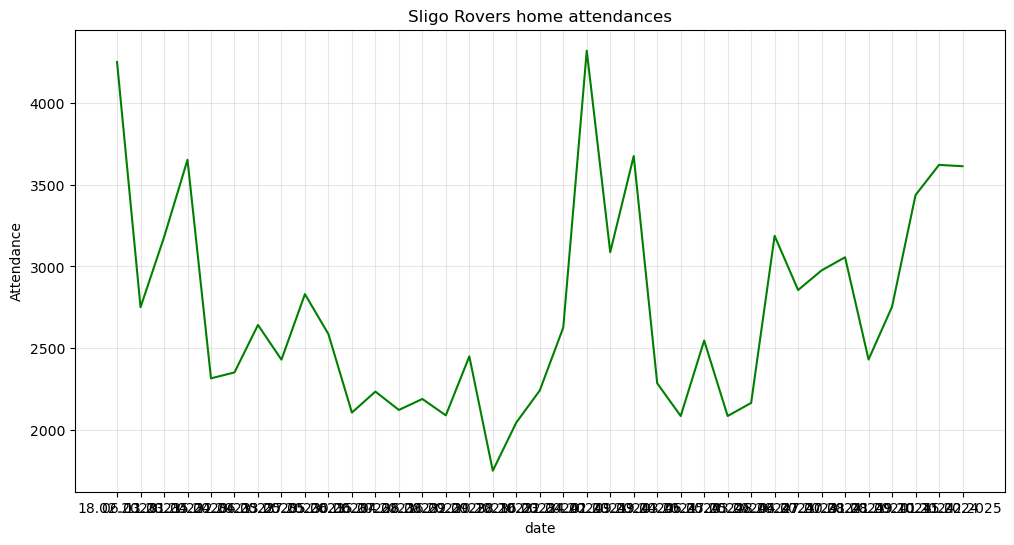

In [179]:
#plotting passenger numbers over time using lineplot

plt.figure(figsize=(12,6))
sns.lineplot(data=sligo_rovers[sligo_rovers['home_team'].str.contains('Sli')], 
             x = 'date', y = 'attendance',color='green')

plt.yticks(fontsize=10)
plt.grid(alpha=.3)

plt.xlabel('date')
plt.ylabel('Attendance')
plt.title('Sligo Rovers home attendances')
plt.show()